<a href="https://colab.research.google.com/github/chrysshawk/Coursera_Capstone/blob/master/IBM_Applied_Data_Science_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IBM Applied Data Science Report: Identifying Restaurant Business Opportunities
by Christoffer Haukvik for Coursera, 2020


##Table of Contents

1. Introduction / Business Problem
2. Project Data
3. Methodology
4. Results
5. Discussion
6. Conclusion

##1. Introduction / Business Problem <a name="introduction"></a>

###1.0 Problem Description

This project aims to help prospective investors and entrepreneurs within the food/restaurant category to establish a new business that is likely to succeed. To be specific, we are going to provide an answer to this **business problem/ question:**   
- If we are going to establish a popular restaurant in a given city, where should we establish it, what type of restaurant should it be, and within which price range?


###1.1 Problem Background
The task of establishing a new venue is usually challenging: One needs to perform market research about the potential areas, identifying what the competition is doing, what the characteristics are of existing well-performing and poor-performing ventures, as well as identifying any missing market segments that could be fulfilled.

This should be of interest to prospective investors, entrepreneurs, as well as to existing restaurant owners who might want input in how to improve the popularity of their restaurant. Additionally, this would provide useful to other investors in the general area.

###1.2 Project solution
This project will assist in the above by automating parts of the process by collecting information about the given area and the venues in the surrounding area. For this purpose it will use data from FourSquare, which is one of the largest repositories of venue information, especially pertaining to the restaurant business, and which venues have the highest popularity.  

We will then analyze the characteristics of the venues that are already successful to provide recommmendations as to where the restaurant should be located, as well as which type/category of restaurant is likely to succeed, and which price ranges it should fall within.

###1.3 Project Definition and Scope
Specifically, this project aims to answer the following business questions:
1. In which postal area should a restaurant business be located?
2. Which venue category is most likely to succeed?
3. Should the given restaurant be within any given price ranges?

The output of the project will be a recommendation to the above business questions, as well as giving insight into the overall characteristics of the given areas and various restaurants' popularity.

The input required for the project by the user is as follows:
1. Which city should be analyzed
2. Which radius surrounding the city's centre should be analyzed

For the purpose of this project, we are going to investigate the city of Las Vegas in Nevada, United States, including all surrounding areas of the city centre by a radius of 15 kilometers.

Of course, the overall recommendation will only form a part of the required analysis of establishing a venture, yet it will give insight into what features make the existing restaurants popular in that area.

##2. Project Data <a name="project-data"></a>

###2.0 Data Requirements
In order to solve the business problem, we need two kinds of data:
1. **Locational Data** about the areas we are analyzing
2. **Venue Data** about the venues we are analyzing

In the below sections, we will detail the sources of these data, as well as how they will be used in this project.


####2.0.0 Locational Data 
One of the most important aspects in establishing a restaurant is to ensure the location is right. As such, we will need accurate locational data to effectively perform our analysis and evaluation.

**Data about geolocational position (Geocoder)**  

To effectively analyze the area, we need to establish the geolocational position about the location we are analyzing. Specifically, we need to know the latitude and longitude of the location.  

*Source:*  

We will use the Geocoder library in Python for this purpose (https://geocoder.readthedocs.io/), and specifically use the Arcgis source of data to ensure the data is consistent in case the user selects different locations and countries in the analysis.  

*Data Example:* 
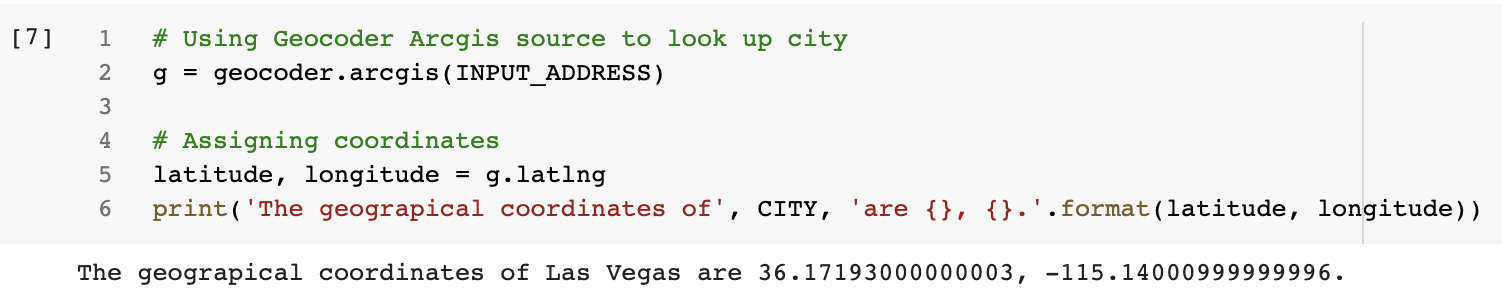
   

**Data about zip/postal codes of the surrounding area (GeoNames API)**  

Once we know the geolocational data above, we will need to get details about the zip/postal codes in the surrounding area with the defined radius limit. This will also need to include the geolocational position of each of the postal codes, as well as the name of the city/location associated with each postal code.  

*Source:*   

We are going to rely on the data and functionality as provided by Geonames's API service (http://www.geonames.org/). The GeoNames API will look up zip/postal code information surronding the geolocational position, including the geospatial data of these zip/postal codes. This also accepts reverse geocoding, that is, the possibility to provide a given set of location information of a given postal code. One needs to register with Geonames API to get this data, which is free. For the purpose of this project, we will use the "findNearbyPostalCodes" endpoint, in JSON format (link: http://api.geonames.org/findNearbyPostalCodesJSON).  

  
*Data Example:*  
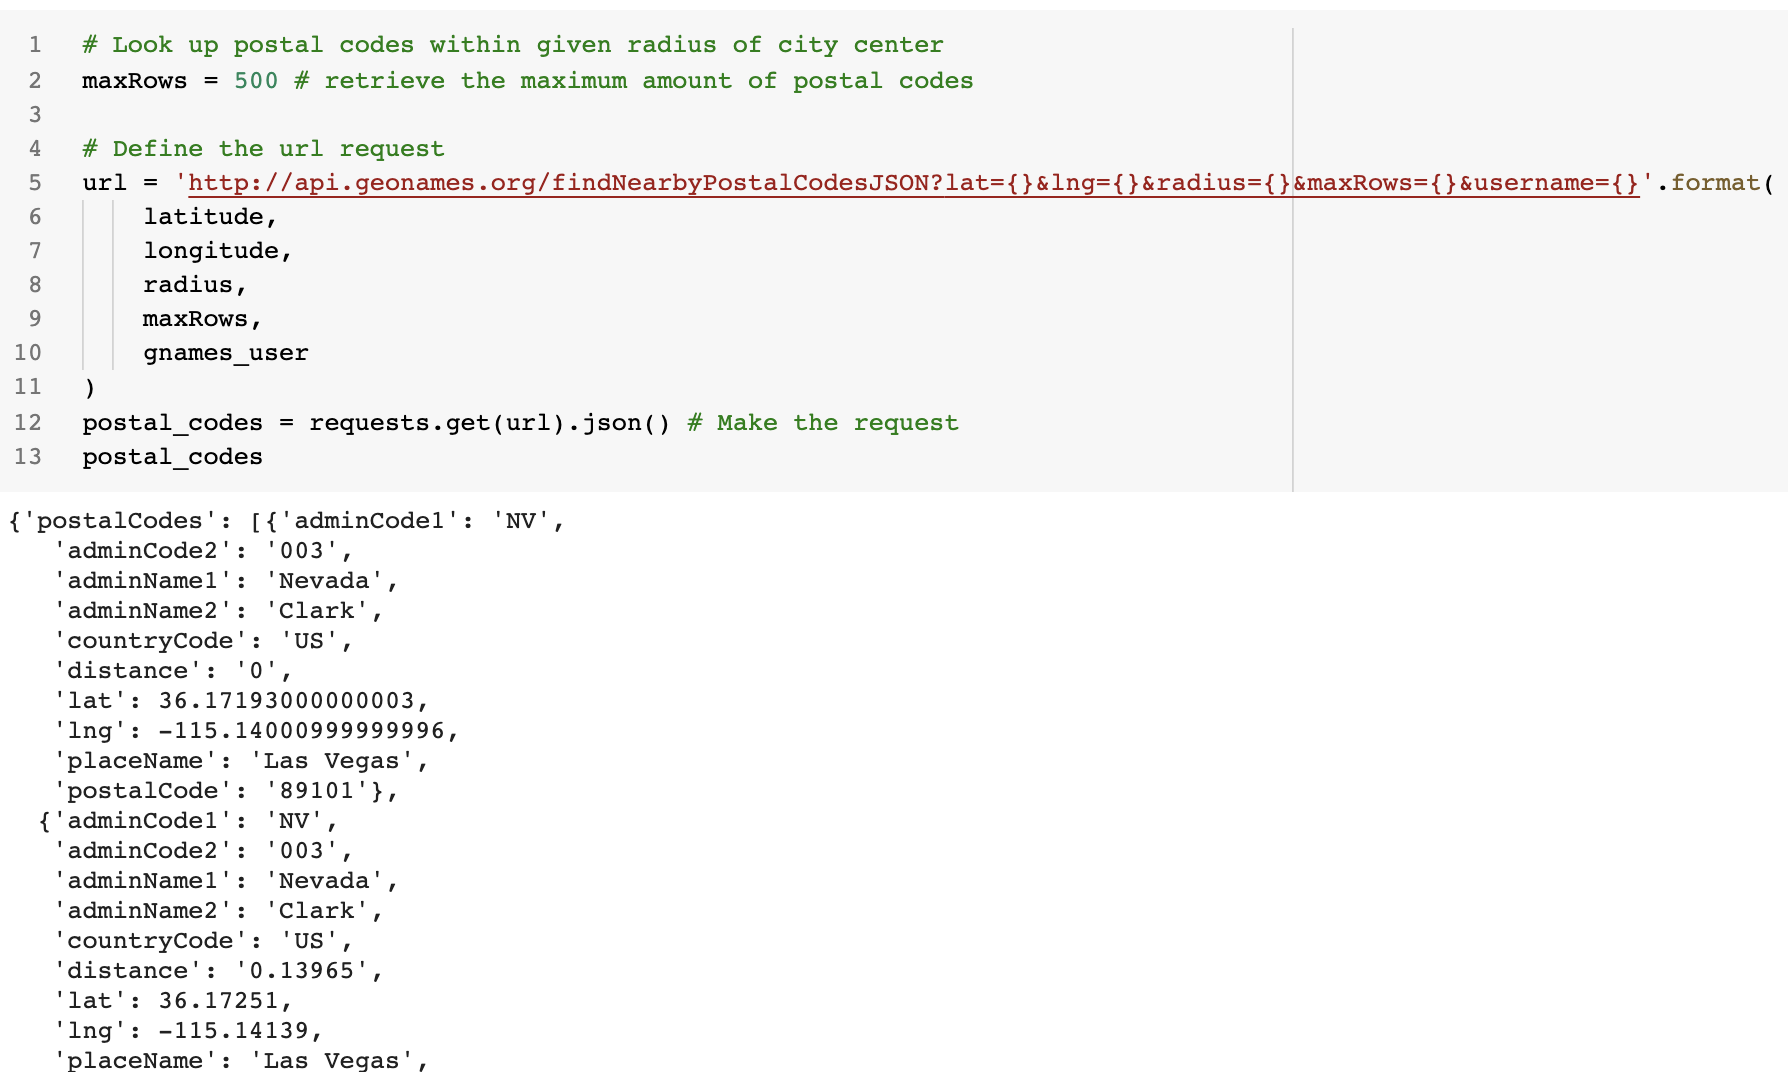

####2.0.1 Venue Data
Secondly, we need to retrieve data about the relevant restaurant venues in the areas we are analyzing. Specifically, we will need data about:
  - Venue ID
  - Venue Popularity
  - Venue Price Range (1-4, 1=least expensive, 4=most expensive)
  - Venue Category
  - Venue Postal Code
  - Venue geospatial location

*Source:*  
We will use Foursquare's [Places API](https://developer.foursquare.com/docs/places-api/endpoints/) to fetch data about the most popular venues in the given area. For this purpose, we will need to set up a free account with Foursquare, which allows for up to 950 regular calls per day. In this project we will only use regular calls, using Foursquare's API GET requests toward the following Endpoint group and Endpoint:
- Endpoint group: Venue
- Endpoint: Explore

Documentation of the above is available at [FourSquare API Endpoint documentation](https://developer.foursquare.com/docs/api-reference/venues/explore/)

Given the selected location, we will make multiple calls towards the FourSquare API to fetch as many venues as are available (cap at 500) and ask Foursquare to rank them according to popularity. This feature will be essential for our analysis, since we are interested in identifying what characteristics makes for a popular venue.  

However, since we also need to get data about the various price ranges of the various venues, we will make calls to the same endpoint for each price range. That way we will be able to know which price category each venue is associated with.

*Data Example:*

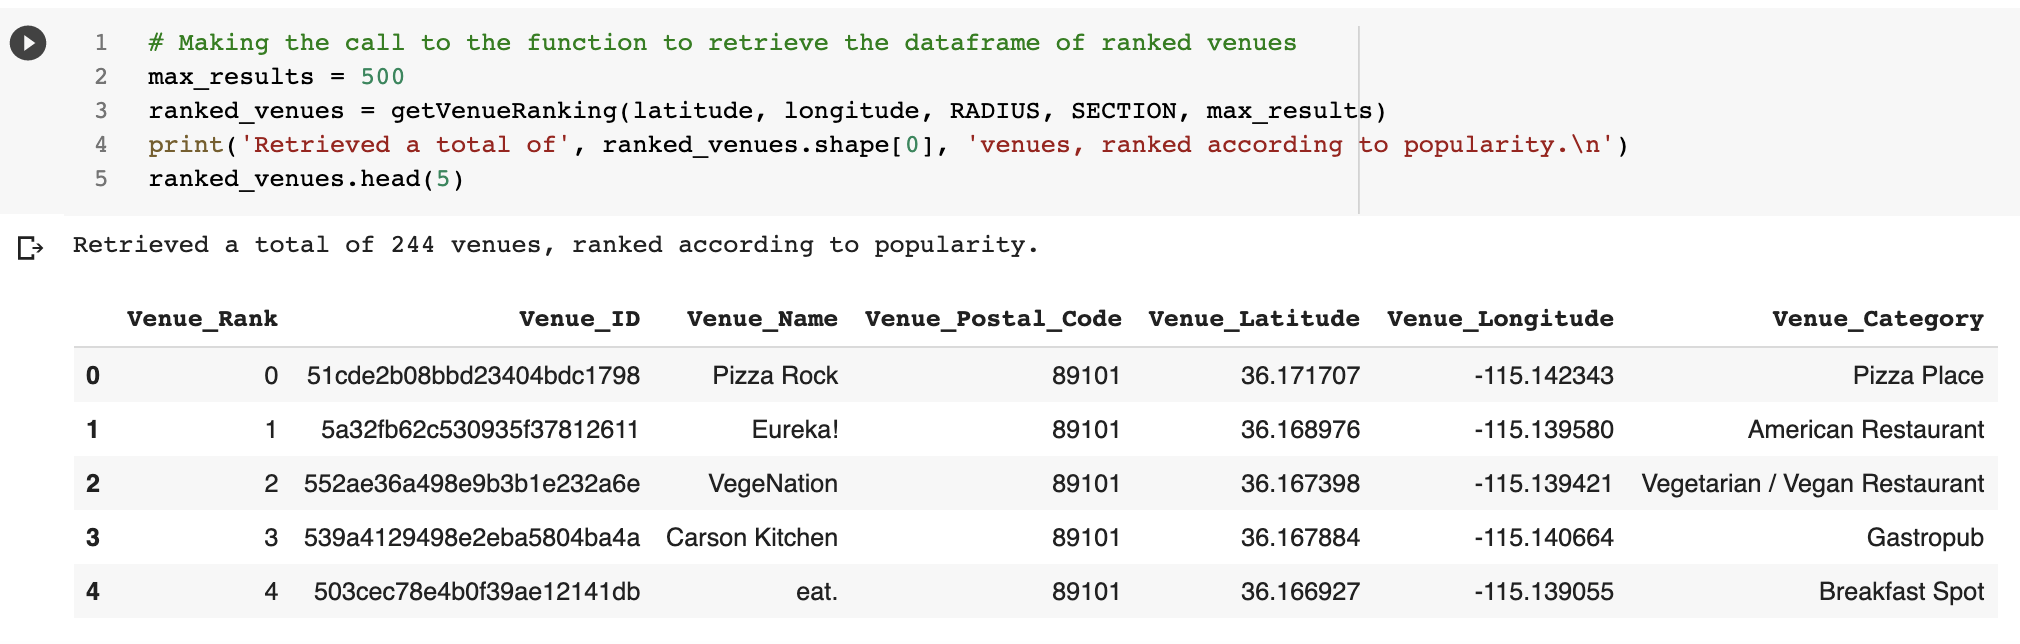

###2.1 Use of Data for Analysis

####2.1.0 Data collection and pre-processing:  
Given the above data requirements and data sources, we will collect and pre-process data in the following steps:
1. Define our input parameters for the project. This includes:
  - Defining the city/location we will analyze
  - Defining the radius of the surrounding area to include in the scope
  - Entering the credentials for GeoNames- and FourSquare APIs
2. Retrieve the geospatial coordinates of our chosen location using Geocoder
3. Retrieve the postal codes, area names, and associated coordinates of the specified area using GeoNames API
4. Retrieve a list of the restaurant/food venues in the relevant areas from FourSquare, sorted by popularity
5. For each price range of the venues, retrieve which range they belong to
6. Consolidate the above, creating a dataframe containing the popular venues with their associated price ranges, and their associated location and postal code data (postal code, area name, and geospatial coordinates)

Through the above we will have a dataframe that can be used in our analysis,  containing a list of venues, ranked by popularity, their price category, their geospatial coordinates, as well as their associated postal code details, including the area name, and postal code geolocational position.

*Data Example:*

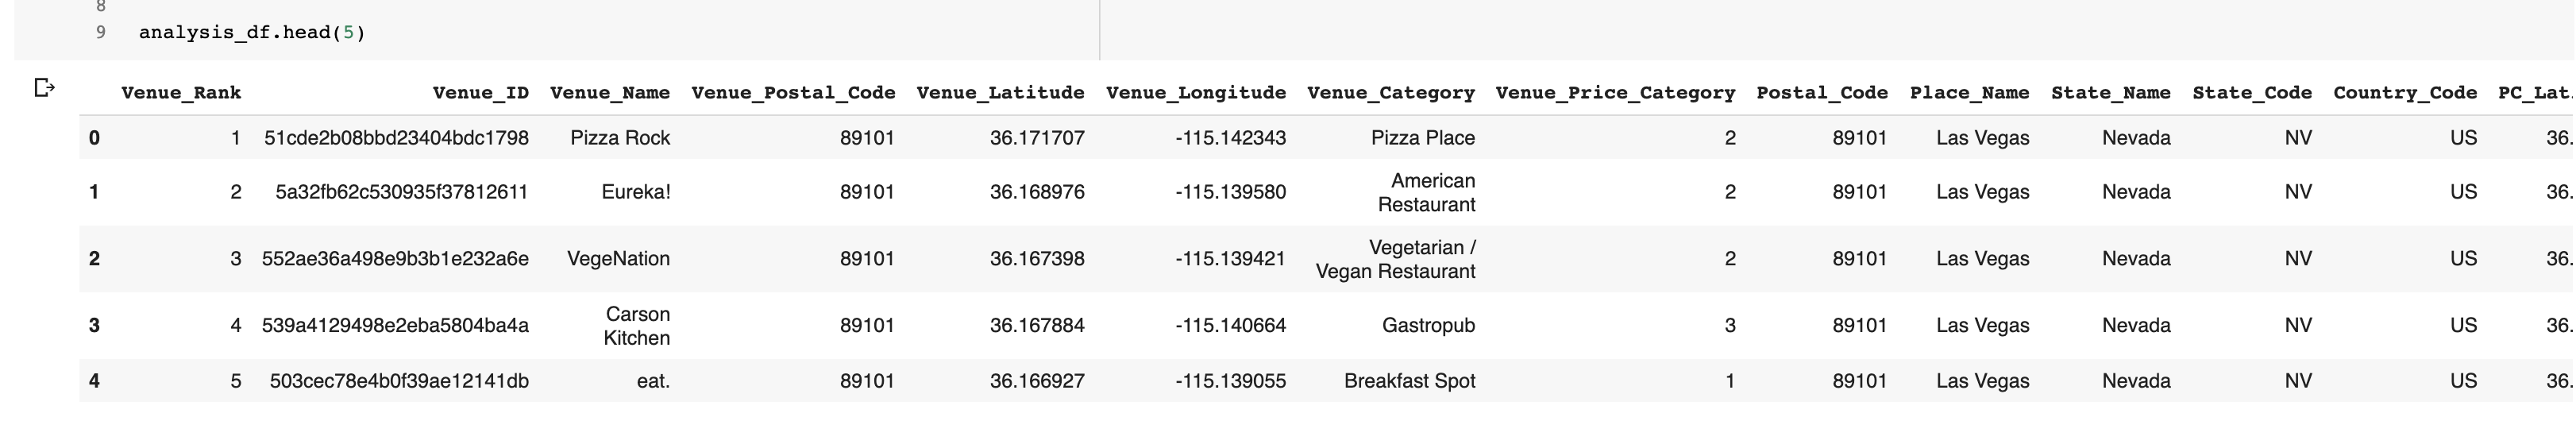

####2.1.1 Data analysis 
When we have the above data, we are in a position to carry out the analysis part of our project.  

The above data will help us in determining which characteristics make for a popular venue, as well as giving insight into the importance of each postal area, the category of the restaurant venue, and its associated price range.

This will be used to create a recommendation about the following:
- Where venues are more likely to be popular
- Which venue categories are popular
- Which price ranges are popular

Given the above recommendations, we should be in a good position to use the gathered information as input in our evaluation of establishing a new restaurant.

The specifics of this analysis will provided in the next section; Methodology.



##3. Methodology <a name="methodology"></a>

In this section, we will discuss and describe how we have analyzed and evaluated the data for this project. 

We have done this through three parts:
1. Exploratory data analysis
2. Determining a statistical metric for identifying potential business opportunities
3. Applying machine learning using k-Means clustering to investigate how the various categories of restaurants can be analyzed to gain insight into the characteristics (features) that drive top performing businesses - as well as highlight which features might drive low performance and should consequently be avoided

The rationale of the steps is to first gain insight into the data through the data exploration. The second step involves determining the features of the top performing restaurant venues in our dataset and aims at providing recommendations as to where the venue should be located, what category it should be, as well as its price range. The final step of using clustering will ideally give us additional information about the characteristics of top- and low- performing venues, and will also serve as input to our recommendation through triangulation. By triangulating the results from both parts (2) and (3), we should be able to provide a more robust and comprehensive recommendation overall.

Given the above, we should be able to provide insight as to what might be predictors of a popular restaurant venue.

###3.0 Exploratory data analysis

An important first step is to perform exploratory analysis of the dataset. The purpose of exploratory data analysis is to investigate the overall data we are working with as well as identifying potential patterns and potential issues with the data.  

In this section we explore the following:  
- The fundamental statistics of our dataset
- The postal code areas
- The restaurant venue categories
- The price ranges of the restaurants

####3.0.0 Dataset fundamentals

To know what data we are working with, the basic statistics of our dataset are as follows:
- Number of venues: 239 (ranked according to popularity)
- Number of postal areas: 31
- Number of venue categories: 51
- Number of price ranges: 4  (from 1=least expensive to 4=most expensive)

Also, to ensure the locational data we are working with is correct, we plotted the given venues onto a map to see the distribution of the venues as well as their associated price ranges.  

**Venue distribution in Area per Price Range (from 1=least expensive to 4=most expensive)**  
*(Blue=1, Light blue=2, light red=3, red=4)*

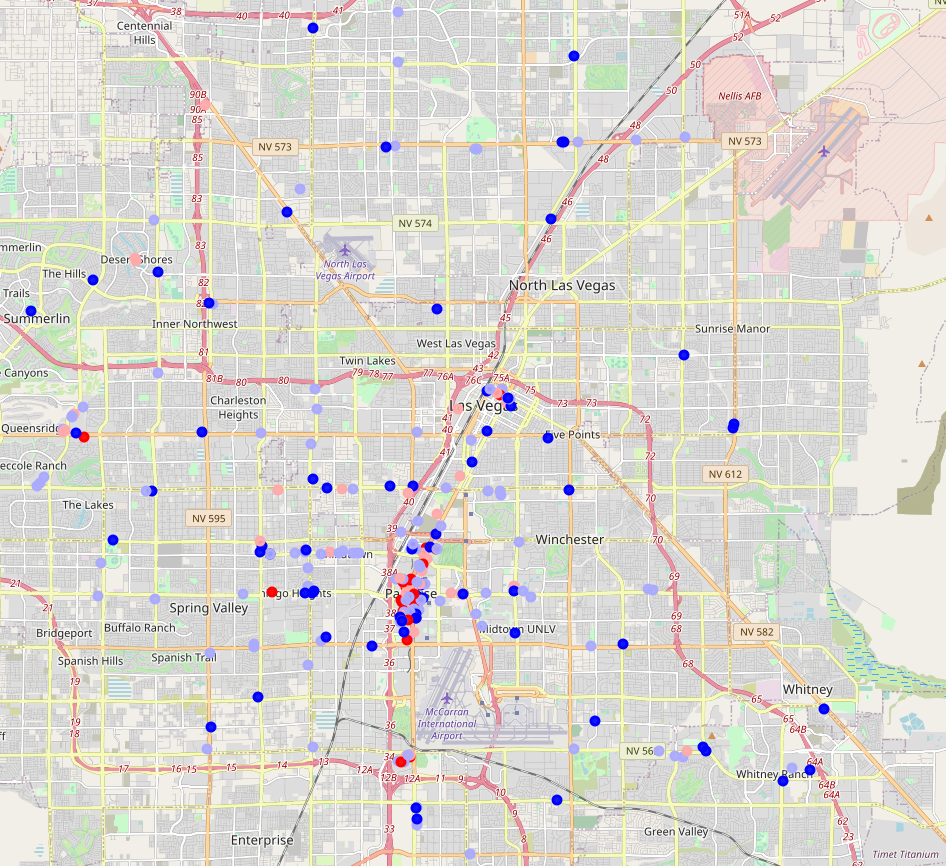

####3.0.1 Postal Code exploration
Since location is of particular importance in determining the popularity of venues, we furthermore explored the postal areas within our scope to understand both the number of venues within the various areas as well as how venues were ranked within the postal code areas.

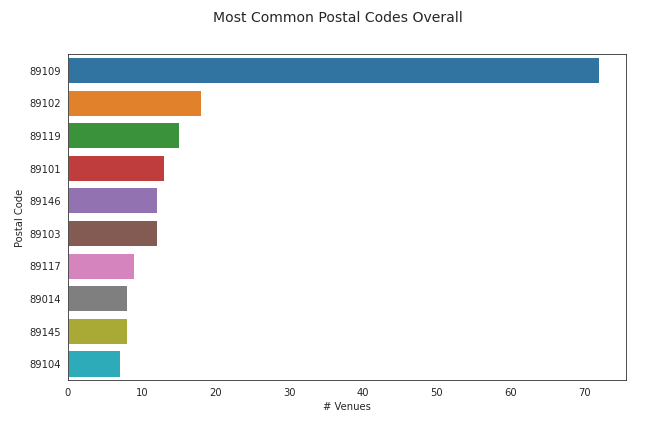

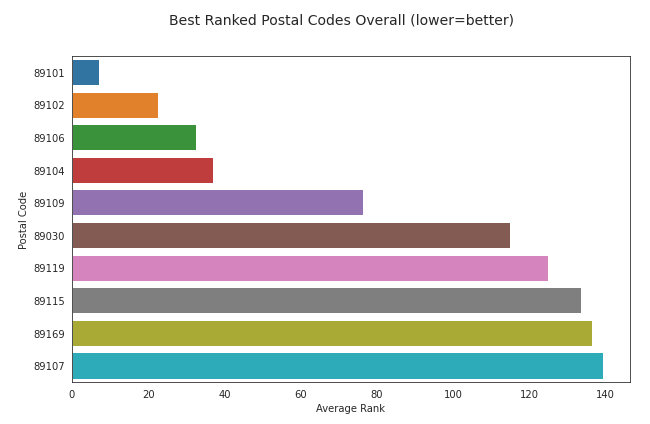

Of particular note above, we could see that Postal Code 89101 had substantially higher mean rank (popularity) than the rest of the postal areas, although it had far less venues in total than other areas. Postal Code 89109 by far has the most restaurant venues in the Las Vegas area (>70 venues).

####3.0.2 Venue Category exploration
Next we explored the various venue categories; i.e. what kind of restaurants were in the dataset. The purpose of this investigation was to identify if there are particular restaurant categories that are either very common, or are very popular. This should give us insight into which restaurant category might be more interesting in terms of establishing a new venture.

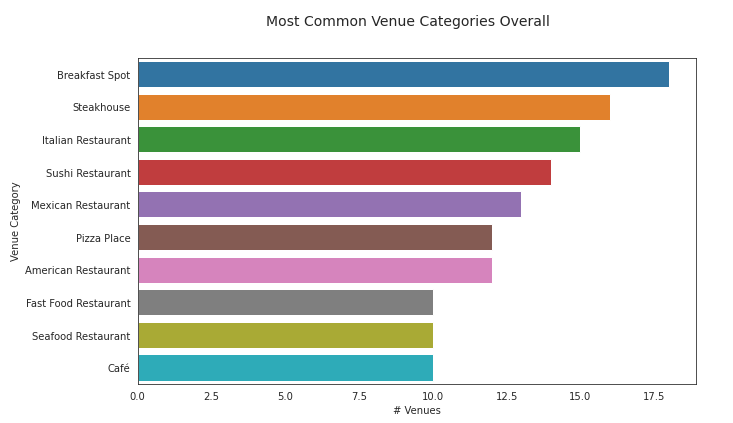

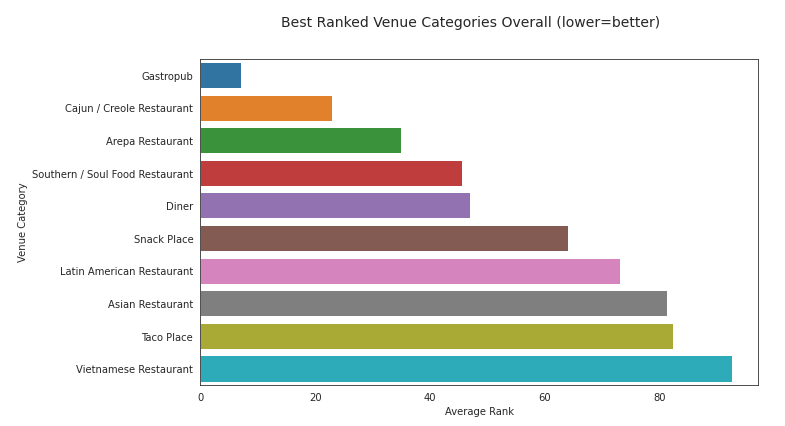

As we could see from the above, the most common restaurants were breakfast spots, steakhouses and Italian. However, this seemed to have little-to-none relationship with the rank (popularity) of the given venue category. It seemed the more niche venue categories overall has a higher popularity; in particular the Gastropub category.

####3.0.3 Venue Price Range exploration
As the final part of our dataset exploration, we investigated the prevalence of the various price ranges as well as how they relate to the overall popularity of the venues. This is of interest to determine if there is correlation between the price range and the venue popularity.  

We chose to look at this somewhat differently to the above since the sample size was fairly high per category. Specifically, we wanted to look at not only the count of venues per price category, but also to see the entire distribution of how venues were ranked per price category, as per the graph to the right.

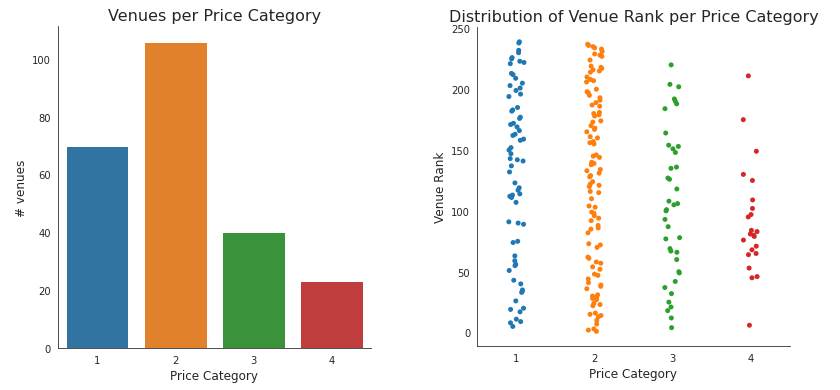

The main findings from the above were that most venues fall within price categories of 1 and 2 (i.e. they are generally less expensive). However, looking at how the venues ranked in popularity, we can see there is generally little effect on the overall distribution of venue ranks as related to the price category. In other words, there seems to be little correlation between a venue's price range and popularity.

###3.1 Metric for recommending business opportunities
In order to provide recommendations for business opportunities, we have created a metric that seeks to answer the following:
1. Which areas are most attractive for new restaurants?
2. Which restaurant categories are recommended in each area?
3. In the most attractive area, what are the recommended venue categories and associated price ranges of the given venue?

The above should be valuable input when considering any new restaurant business, and also assist in a general understanding into what are the characteristics that drive popularity.

To create this metric, we performed the following steps:
1. Select the 50 most popular venues. Given the size dataset we are working with, these represent the restaurants that attract the most customers, and we are interested in determining the characteristics of these.
2. Recommend the most attractive postal areas according on the mean popularity rank for each area. Since we already selected the top performing venues in the first step, we would exclude any potential outliers that might negatively affect the mean popularity rank per area. However, if a given postal code area still seems to outperform the rest in terms of popularity, we will have a strong basis onto deciding this is particularly linked to popular restaurants.
3. Recommend the restaurant venue category based on which venue category is most popular in the top performing postal area.
4. Investigate that area and deliver further recommendations based on which venue categories perform well, as well as advice on which price ranges seem most appropriate. This included:
  - Calculating mean rank per venue category
  - Calculating mean rating per venue category
  - Calculating mean price range per venue category

Given the above, we will have a good foundation for both understanding the drivers for the top popular restaurants as well as their characteristics.

The results of the above analysis are presented in the results section.

###3.2 Determining popular restaurant venue characteristics using k-Means machine learning

In this part we are going to apply the machine learning technique of machine learning to investigate the results of clustering venues according to the characteristics (features) of the various venues.

####3.2.0 Justification for use of k-Means in this context
In short, k-Means clustering is a machine learning algorithm that can be used to find patterns in a dataset with the aim of creating separate groups (clusters) within that dataset of entries that share similar characteristics (features). This will be of particular use in this case since we have a dataset with numerous categorical variables, i.e. categories of data such as "Postal Code", "Venue Category" and "Price Range" - all of which are essential to our analysis but which do not necessarily easily fit into typical regression models.

####3.2.1 Cluster size
In applying k-Means clustering to the dataset, we needed to decide the number of features to include in the clustering mechanism. A small number of clusters might lead to each cluster not sufficiently differentiating between the different types of restaurant venues and their popularity, whereas a too high number of clusters might cause a too high differentiation between the clusters, where similar venues with similar performance might be categorized as different.

Having tested numerous cluster sizes in our dataset, we chose to use 5 clusters, which seems to accurately fit the various restaurant venues into appropriate categories.

####3.2.2 Feature selection and encoding
Given the dataset we are working with, the features we will include in the clustering alogrihtm are restaurant popularity (rank), restaurant category, and venue price range, within each postal area. These have been selected since they are deemed the most important differentiators in the dataset we have to work with. Furthermore, given the exploratory analysis we have performed, they seem to strongly relate to a venue's popularity.

Since many of the features we are using in the dataset are categorical variables (also called factor variables), we have created dummies with these features through one-hot encoding. This has been done through the below steps:
1. Transformed the ratings of the venues into 5 groups, with ratings from "Very high" to "Very low"  
2. Included all features into a dataframe, one-hot enocde the features so it can be interpreted by the k-Means algorithm
3. Useed the k-Means algorithm to cluster according to the postal codes
4. Evaluated the clusters for the high-rated venues, and investigate which features seem to be linked to high (and low) ratings

Finally we did the following:
1. Create a dataframe subsetting the cluster with the highest popularity
2. Show each postal code associated with the cluster
3. Break down the three most popular venue categories in the cluster

Based on the above process, we can identify the features of the high performing venues and use those in our overall recommendation for restaurant business opportunities.

The results of the k-Means algorithm are presented in the next section.

##4. Results <a name="results"></a>

###4.0 Metric for recommending business opportunities
The first part of our metric was to extract the 50 most popular venues, and evaluate their average rank within each postal code area. The results of this analysis is presented in the below data table.

**Table: Top performing venues' average rank per postal area (lower average rank = better)**

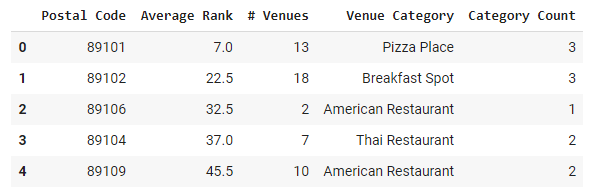

As can be seen from the table, the most popular venues can be found within the postal code 89101, which significantly outperforms the rest of the postal code areas. Furthermore, we observe it has a high sample (13 venues) size compared to our dataset (of 50 venues), which indicates the average is not skewed by outliers.

In terms of venue popularity, we observe this postal area has a prevalence towards Pizza Place restaurants, of which there are 3 (out of 13). Altough this is not a significant sample size, it may still indicate that Pizza Places within this postal code might be linked towards high popularity.

Looking at the rest of the postal codes in the results, we can see that the average rank of 89102 is also quite high, and also has a significant number of venues within the dataset. In this postal code, there is a prevalence of Brekfast Spot, of which there are 3 venues (out of 18). 

Given the remainder of the postal areas, we observe they neither match the popularity of the first two, nor do they have as many venues. 

We can also illustrate this graphically as per below, where we display the average rank per Postal Area, and include the most prevalent restaurant venue per area.

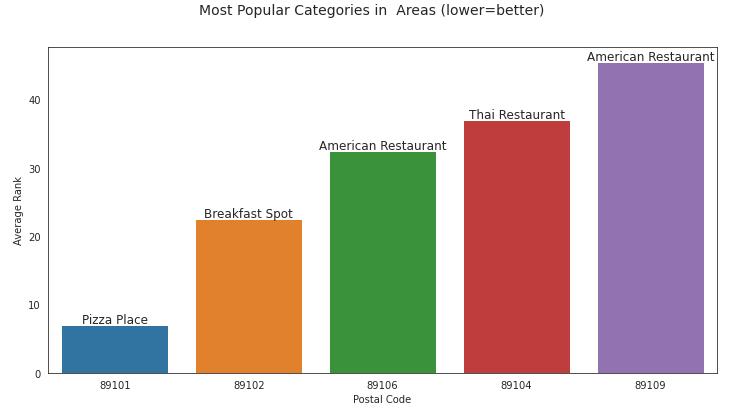

Given the above, we further wanted to investigate the features of the restaurants in the most popular area - in this case postal code 89101.  

  
**Table: Results of Most Popular Postal Code 89101**

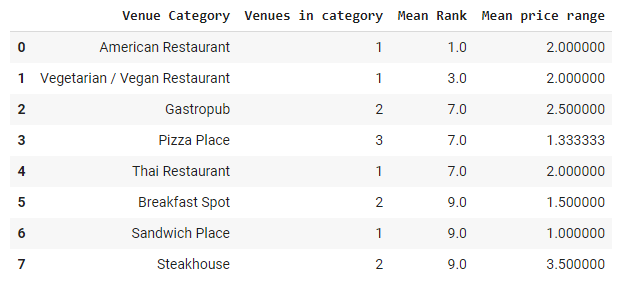

As we can see from the above, all the venues have a very high mean rank: Of the entire dataset (ranked from 1 to 239), the venues above all have a mean rank of less than 10. In terms of popularity, these are the top 3.8% performing restaurants in Las Vegas.  

We can futher observe these have a mean price category that is relatively low; most of them within the range of 1-2.5 price ranges.

As far as the venue categories go, we observe we have quite a few different restaurant types in this area, making it hard to conclude strongly one way or another. However, few-to-none of these are niche types of venues, which might indicate a predilection towards more mainstream type of restaurant categories.

The above results strongly indicate which are the important features to select when establishing a new restaurant if it should be as popular as possible. We will elaborate on the interpretation of these results in the Discussion section.

###4.1 Results of k-Means clustering for identifying features of popular venues
In this section, we will investigate the results of applying the k-Means clustering algorithm to the selected venue features in our analysis.

First, let us investigate the mean values of the clusters in our analysis as they relate to venue popularity and price category.

**Table: Mean Popularity and Price Category per Cluster**

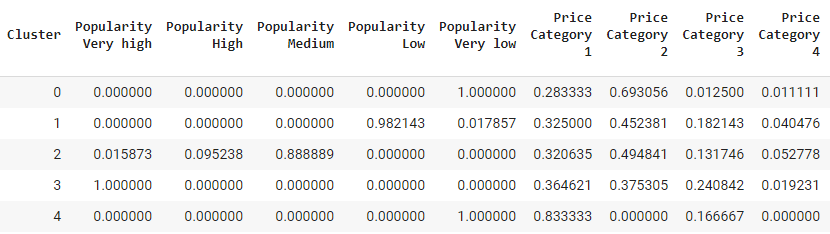

As we can see from the above, the clustering mechanism has done a good job in identifying separate clusters for the popular venues (cluster 3 in particular) and the non-popular venues (cluster 0 and 4 in particular).

Since we are more interested in the high-performing clusters, if we look at the mean price ranges of the most popular cluster (3) and also the second most popular cluster (2), we can see they generally fall within the price categories of 1 and 2 (less expensive), and very rarely are in price category 4 (expensive).

Visually, we can observe these as per below.

**Mean rating of Popularity and Price Category per Cluster**

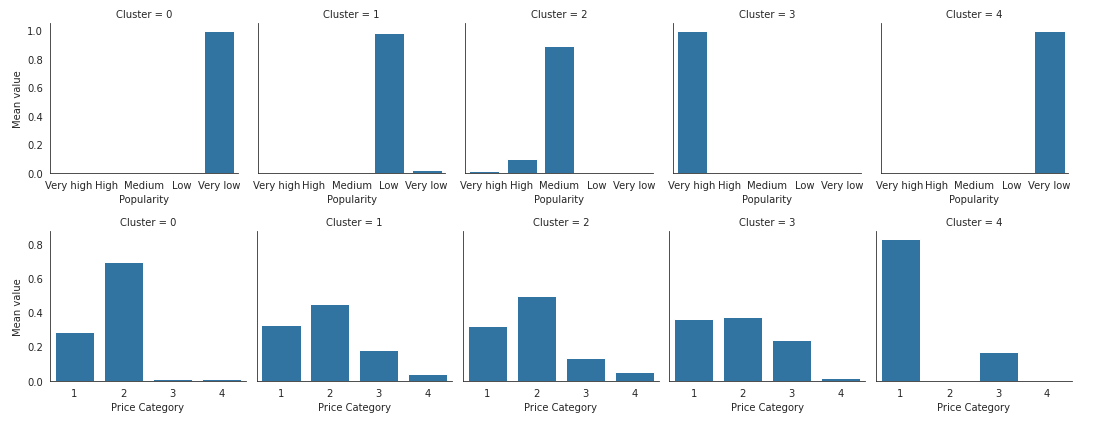

However, from the above, we can also observe what we noted in the initial data exploration on price categories; there seems to be little correlation between the price ranges and the popularity of the various venues. From the above, we can see that most of the clusters have a prevalence of price categories 1-3, regardless of the them being linked to popularity or not.

The final step of our analysis is to identify the most popular cluster - in this case cluster 3 - and list which postal codes are associated with the cluster, as well as the most popular restaurant venue categories in each postal code area.

The below table summarizes these findings, including the postal codes in this cluster, which are the three most popular venue categories, as well as their prevalence in per cent, and consequent rank in the given postal area.

**Table: Cluster with highest popularity: Most Popular Venues per Postal Code**

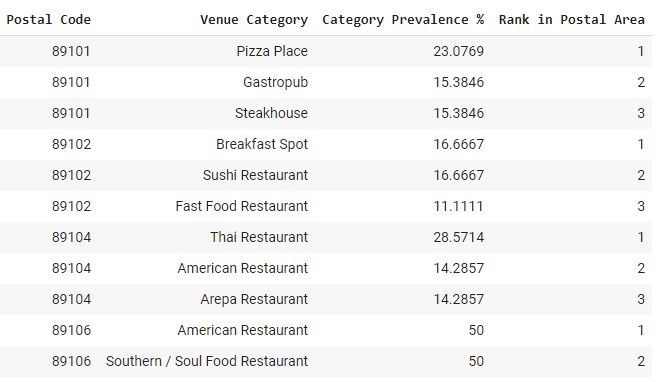

Let us also present this visually to compare the various postal code areas as per below.

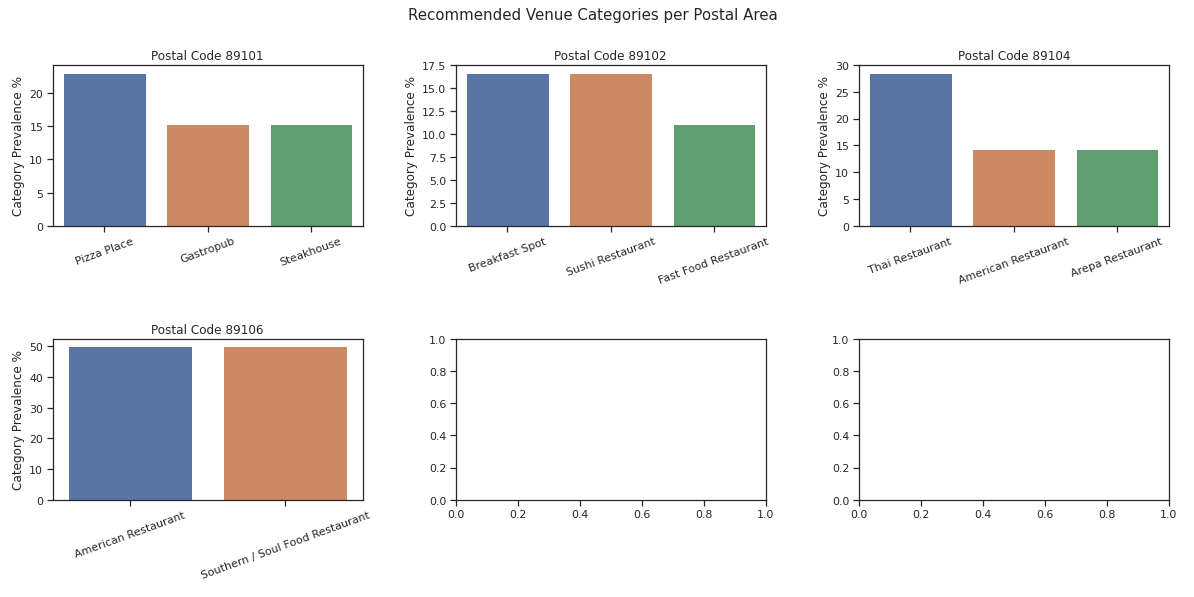

From the above, we can observe the k-Means algorithm identified four postal code areas as the most highly ranked according to their popularity. Incidentally, we note that all of these postal code areas were also identified in our metric for identifying the most popular postal code areas.

Furthermore, we can see the prevalence of the three most popular venues per postal code area. One notable observation is these seem do greatly differ from postal code to postal code, which may indicate the restaurant category is a predictor for popularity according to each postal code area.

Additionally, as we have observed previously, the sample size may be low in certain areas, such as in postal code 89106, causing there only to be two venues present in that area. As such, the robustness of those data may be questionable.

Overall, the above findings do indicate which postal areas are more popular than others, as well as which restaurant category one should consider if establishing a new business. Also recall it seems the venues have higher change of success if they are not towards the more expensive end of the spectrum.

In the next section we will discuss our findings and provide our recommendations.

##5. Discussion <a name="discussion"></a>

The purpose of this project has been to identify what makes for good restaurant business opportunities, and the example location we have chosen is Las Vegas, Nevada. 

In the result findings above, we have identified which postal codes/areas contain the most popular restaurants, as well as which restaurant categories seem to gather popularity. We have also investigated how the various price ranges of each restaurant seems to be related to price, with the major finding that popular restaurants tend to be inexpensive to moderately expensive, and rarely expensive. 




####5.0 Validity of results/findings
Before providing a recommendation based on the findings, we will address the overall validity of the results to ensure we have a solid basis from which to give a recommendation.

First, we must emphasise this project's scope has been limited to evaluating the characteristics of popular restaurants, and is therefore inherently limited to considering popularity as the success criterion. Of course, not all popular restaurants are going to be successful and vice versa, but popularity of a given venture is at least a strong predictor of success. As such, the scope is going to emphasise the popularity domain of a given venture, and not the bigger pictures of economics, such as establishment costs, operating costs, et cetera.

Second, the datset we have analyzed has a limited amount of features, which only include details about popularity, postal codes, restaurant categories, and restaurant price ranges. Although these are highly relevant in any analysis of restaurant popularity, it would be beneficial to include more data about popularity trends, user ratings on given venues, and actual consumption per visit. Such features are however not included in the analysis and would be beneficial in providing a more complete picture.

Third, a strong point of the analysis is the features we have used. Having data about poularity per, location, restaurant categories, and price ranges make for essential features that are important in any analysis of this kind, which do at least garner a solid foundation from which to give a recommendation.

Fourth, we used two separate methods to establish which venues are popular: Both the metric for identifying business opportunities, and the k-Means clustering machine learning algorithm. The combination of two separate methods is referred to as triangulation, and may strenghten or weaken the findings depending on the result. In this case, both methods provided the almost exact same results in terms of where the most popular venues are located, which type of restaurants they are, and which price range they fall within. This strengthens our recommendation, since two completely different methods provided the same results.

In summary, the quality of the findings seems to be robust, but the main limitations of the recommendations is they only use a venue's popularity as the metric while it would also benefit from more detailed data about the venues. 

####5.1 Findings and recommendation
Let us recap the project's original business problem/question:
- If we are going to establish a popular restaurant in a given city, where should we establish it, what type of restaurant should it be, and within which price range?  

In this project we used Las Vegas as the example case.

*Recommendation on Postal Code/Area*  
Given the analysis on postal code data, we have found a very strong prevalence of the most popular ventures being situated in postal code 89101. As such, there is strong evidence to suggest one should investigate the possibility of establishing a new restaurant in this area.

*Recommendation on Restaurant category*  
As we have seen in our results, the choice of restaurant category is a less clear-cut case. The more popular restaurants in the area are pizza places, gastropubs, and steakhouses. On the one hand, a new business could try to copy the success factors of those existing venues, yet on the other hand it might be beneficial to establish a venture that brings something new to the restaurant market. However, given these restaurants are popular despite having multiple of them in the area, it seems safe to say the market still has strong demand for such restaurant categories. Still, one would of course be adviced to conduct further market research.

*Recommendation on Price range*  
In terms of price ranges, the overall findings for most venues in Las Vegas is they tend to favor less expensive types of restaurants, although there is some variation. The given postal code area seems to favor restaurants in price categories from 1 to 3, with no clear favor of either. However, if one wants to play it safe a good starting point would be price category 2, which is also the most common category in the area.

*Summary*  
Given the above recommendations, we have addressed the original project question. These recommendations are however only based on this data, and we would advice to conduct further research prior to establishing a new restaurant business.

####5.2 Further research
Given the scope of this project, we would strongly advice to conduct more research prior to establishing a new restaurant business. Although this analysis gives direction as to the postal area, restaurant category, and price range, the analysis uses a restaurant's popularity as the metric of success. 

The economics of conducting a restaurant with those parameters need of course be considered, as well as both a more qualitative investigation of the area and restaurant categories in question, and more quantitative analysis such as market research into what kind of restaurant people in that area would like.

##6. Conclusion <a name="conclusion"></a>

In this project we have investigated how we can provide recommendations into how we could idenfity a restaurant business opportunity, by analyzing data about the venues in a given area, and using a combination of statistics and machine learning methods to indicate where a restaurant should be located, which type of venue it should be, as well as within which price range(s) it should fall.

The first part of the project identified which data we could use for this purpose, where we have collected locational data about the area(s) included in this analysis, as well as data about the relevant venues in the given area(s). This data was then consolidated to be used for our analysis.

The second part of the project consisted of a methodology which first explored that data to identify how it could be used, and secondly devised two distinct methods for how to use the data into providing answers to the business question.

Third, we listed the results of these methods, including general observations into how they provided insight into what types of restaurants would likely provide the highest level of popularity.

Finally, we discussed the overall findings, including a section on the validity of our recommendations as well as a recommendation on where to locate the new restaurant, which category of restaurant it should be, and which price range it should have. Furthermore, we suggested which additional research would be recommended before actually establishing a new restaurant.

We hope you have found this project useful. Thank you for reading!